# Delivery_time -> Predict delivery time using sorting time 

##**Import Data Set**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv("delivery_time.csv")
print(data)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


##**EDA and Data Visualization**

In [ ]:
data.info()  #information about columns and records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.shape

(21, 2)

In [ ]:
data.isnull().sum()   #checking for the null values

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
data.corr() #Correlation Analysis

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0.5, 1.0, 'ScatterPlot For Time')

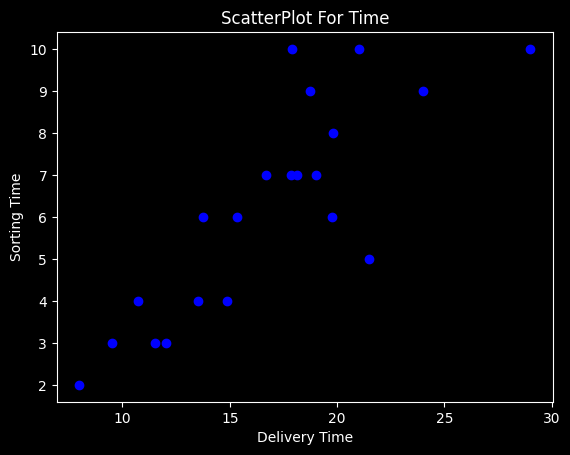

In [ ]:
plt.plot(data['Delivery Time'],data['Sorting Time'], "bo")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("ScatterPlot For Time") 

<Axes: xlabel='Delivery Time', ylabel='Density'>

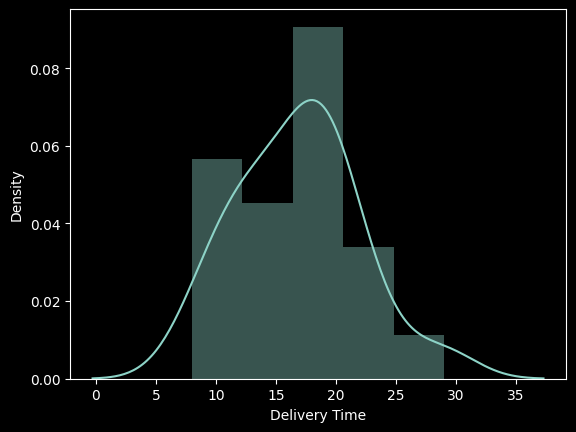

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

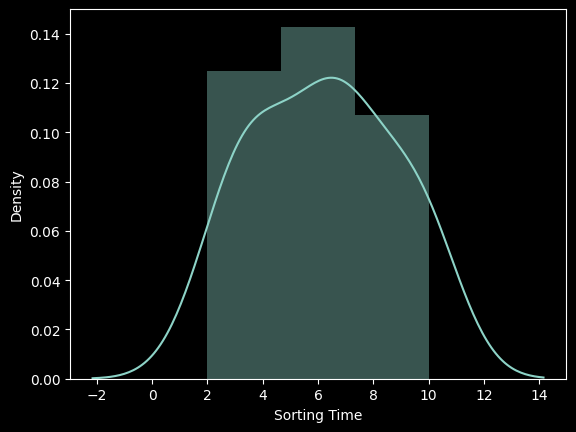

In [ ]:
sns.distplot(data['Sorting Time'])

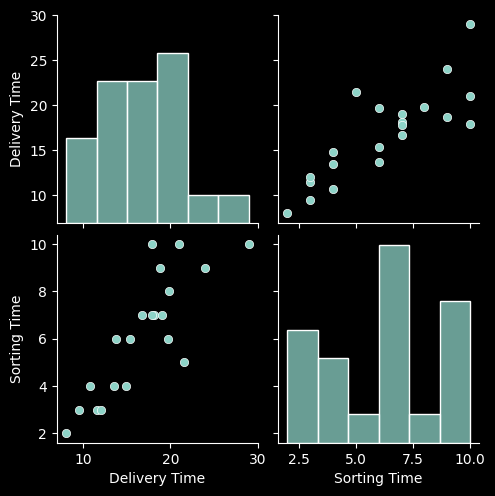

In [ ]:
sns.pairplot(data)

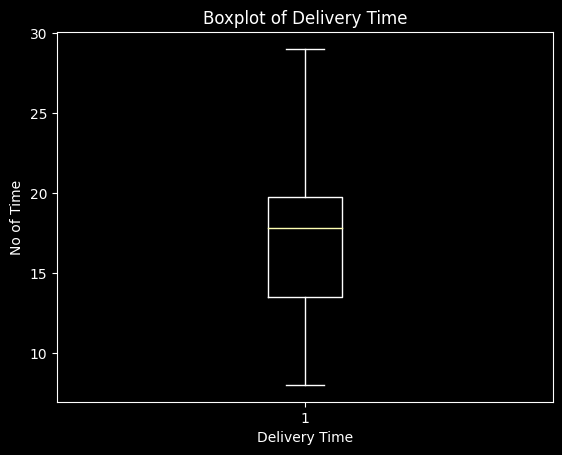

In [ ]:
plt.boxplot(data['Delivery Time'])
plt.xlabel("Delivery Time") 
plt.ylabel("No of Time")
plt.title("Boxplot of Delivery Time") 
plt.show()  

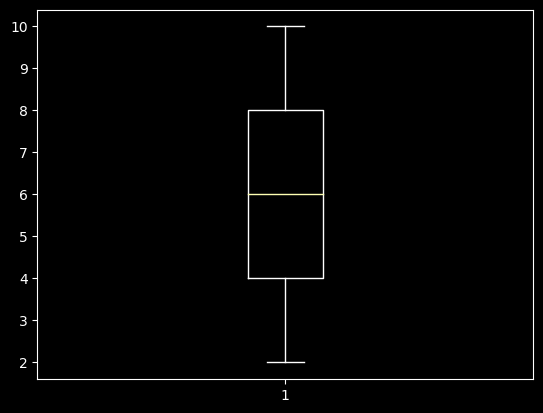

In [ ]:
plt.boxplot(data['Sorting Time'])
plt.show()

In [ ]:
data=data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1) #Rename function
print(data)  

    Delivery_Time  Sorting_Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


##**Fitting a Linear Regression Model**

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Sorting_Time~Delivery_Time",data = data).fit()

In [ ]:
#coefficient
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues) #T values & P values
                                          #\n is for new line

Intercept       -0.667290
Delivery_Time    6.387447
dtype: float64 
 Intercept        0.512611
Delivery_Time    0.000004
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.682271474841723, 0.6655489208860242)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        14:32:05   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [ ]:
pred = model.predict(data.Delivery_Time)
pred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [ ]:
model.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [ ]:
rmse_lin = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred))**2))
rmse_lin #Root Mean Square Error

1.398343056795723

In [ ]:
pred.corr(data.Sorting_Time)

0.8259972607955326

Text(0, 0.5, 'Sorting_Time')

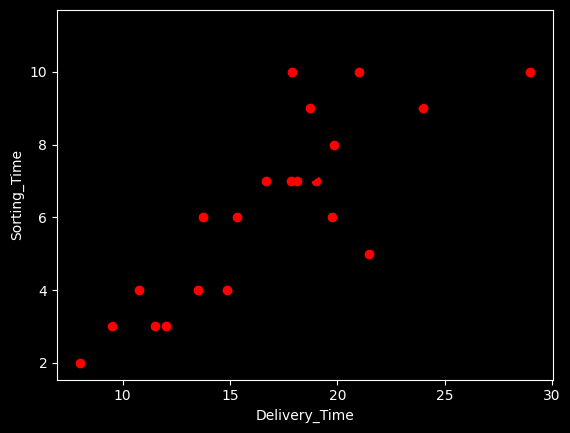

In [ ]:
plt.scatter(x=data['Delivery_Time'],y=data['Sorting_Time'],color='red')
plt.plot(data['Delivery_Time'],pred,color='black')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time')

In [ ]:
model2 = smf.ols('Sorting_Time~np.log(Delivery_Time)',data=data).fit() #using log Transformation

In [ ]:
#coefficient
model2.params

Intercept               -12.499233
np.log(Delivery_Time)     6.735548
dtype: float64

In [ ]:
print(model2.tvalues, '\n', model2.pvalues) #T values & P values
                                            #\n is for new line

Intercept               -4.543446
np.log(Delivery_Time)    6.836088
dtype: float64 
 Intercept                0.000222
np.log(Delivery_Time)    0.000002
dtype: float64


In [ ]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.7109478980584186, 0.6957346295351775)

In [ ]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.59e-06
Time:                        14:32:05   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.resid

0     1.992704
1    -1.031310
2    -1.593942
3     0.093297
4    -0.181351
5     0.103672
6    -0.333179
7     0.335548
8     3.068518
9     1.756035
10    0.378830
11    0.502940
12    0.543982
13   -0.951314
14   -1.254794
15   -1.686869
16    0.845099
17   -0.010043
18    0.493053
19    0.094910
20   -3.165786
dtype: float64

In [ ]:
pred2 = model2.predict(pd.DataFrame(data['Delivery_Time'])) 
pred2 

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [ ]:
model2.resid_pearson

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

In [ ]:
rmse_log = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred2))**2))
rmse_log

1.3337477286899515

In [ ]:
pred2.corr(data.Sorting_Time)

0.8431772637224149

Text(0, 0.5, 'Sorting_Time')

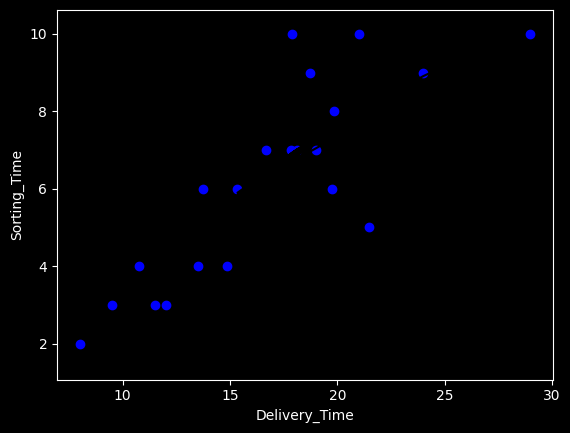

In [ ]:
plt.scatter(x=data['Delivery_Time'],y=data['Sorting_Time'],color='blue')
plt.plot(data['Delivery_Time'],pred2,color='black')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time')

In [ ]:
model3 = smf.ols('np.log(Sorting_Time)~Delivery_Time',data = data).fit()  #Using Exponantioal Transformation

In [ ]:
#coefficient
model3.params

Intercept        0.437237
Delivery_Time    0.076901
dtype: float64

In [ ]:
print(model3.tvalues, '\n', model3.pvalues) #T values & P values
                                            #\n is for new line

Intercept        2.139296
Delivery_Time    6.586789
dtype: float64 
 Intercept        0.045609
Delivery_Time    0.000003
dtype: float64


In [ ]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Sun, 16 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                          14:32:06   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3.resid

0     0.250437
1    -0.089100
2    -0.164263
3    -0.085625
4    -0.364767
5     0.174099
6     0.047563
7    -0.069179
8     0.488829
9     0.318103
10    0.117267
11    0.122377
12    0.225972
13   -0.222981
14   -0.263738
15   -0.195222
16    0.297140
17    0.116005
18   -0.359294
19    0.137537
20   -0.481160
dtype: float64

In [ ]:
pred_log = model3.predict(pd.DataFrame(data['Delivery_Time'])) 
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [ ]:
pred3=np.exp(pred_log)  # as we have used log(Sorting_Time) in preparing model so we need to convert it back
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [ ]:
model3.resid_pearson

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

In [ ]:
rmse_expo =np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred3))**2))
rmse_expo

1.79214500168698

In [ ]:
pred3.corr(data.Sorting_Time)

0.7472768828616799

Text(0, 0.5, 'Sorting_Time')

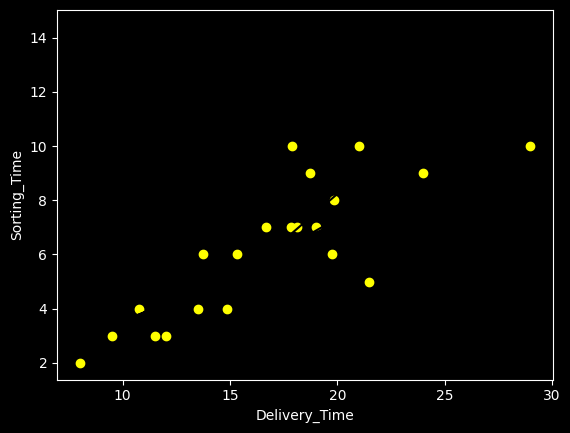

In [ ]:
plt.scatter(x=data['Delivery_Time'],y=data['Sorting_Time'],color='yellow')
plt.plot(data['Delivery_Time'],pred3,color='black')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time')

Text(0, 0.5, 'Sorting_Time')

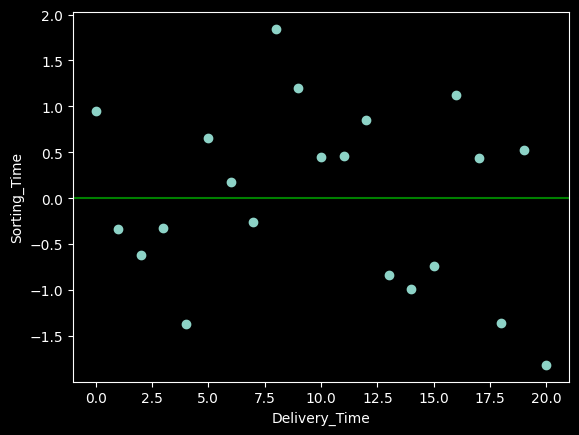

In [ ]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Delivery_Time")
plt.ylabel("Sorting_Time")

Text(0, 0.5, 'Actual')

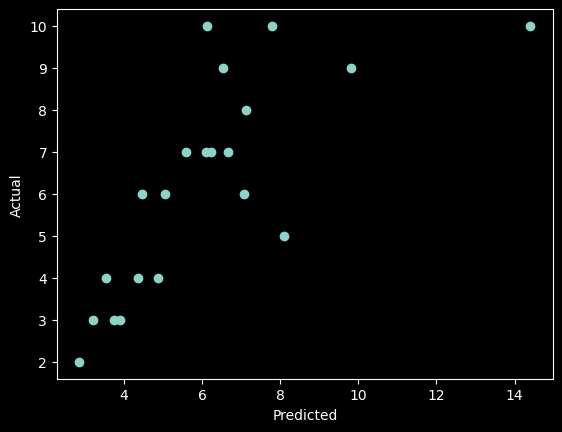

In [ ]:
plt.scatter(x=pred3,y=data.Sorting_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
data["Delivery_Time_Sq"] = data.Delivery_Time*data.Delivery_Time
data

,Delivery_Time,Sorting_Time,Delivery_Time_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [ ]:
model_quad = smf.ols("np.log(Sorting_Time)~Delivery_Time+Delivery_Time_Sq",data=data).fit()  

In [ ]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Sun, 16 Apr 2023   Prob (F-statistic):           6.77e-07
Time:                          14:32:07   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time        0.2272      0.052      4.346      0.000       0.117       0.337
Delivery_Time_Sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred_quad = model_quad.predict(data)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [ ]:
rmse_quad = np.sqrt(np.mean((np.array(data['Sorting_Time'])-np.array(pred4))**2))
rmse_quad

1.34714198002557

In [ ]:
model_quad.resid_pearson 

array([ 0.85808801, -0.55724899, -1.12499417, -0.08143504,  0.36904657,
        0.39353665, -0.23033761,  0.46176795,  1.70343799,  0.96496061,
        0.13818532,  0.96052843,  0.54469546, -0.76595863, -1.06574894,
       -1.21026809,  1.12870339,  0.04272375, -0.32701069,  0.13487468,
       -2.33754663])

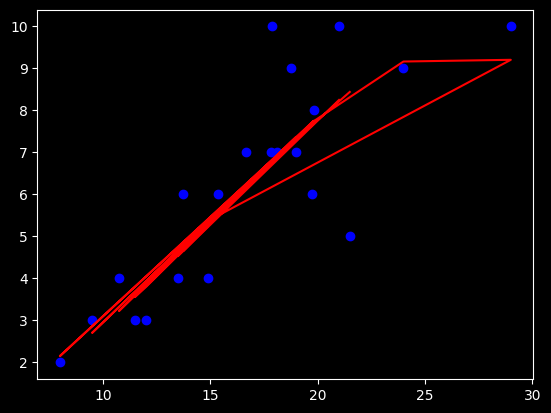

In [ ]:
plt.scatter(data.Delivery_Time,data.Sorting_Time,c="b")
plt.plot(data.Delivery_Time,pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

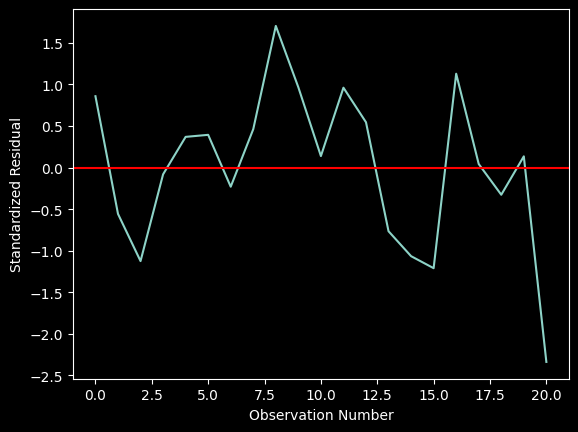

In [ ]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")


Text(0, 0.5, 'Standardized Residual')

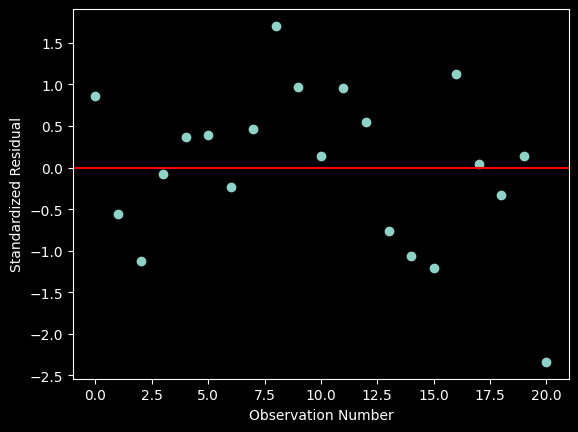

In [ ]:
plt.scatter(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

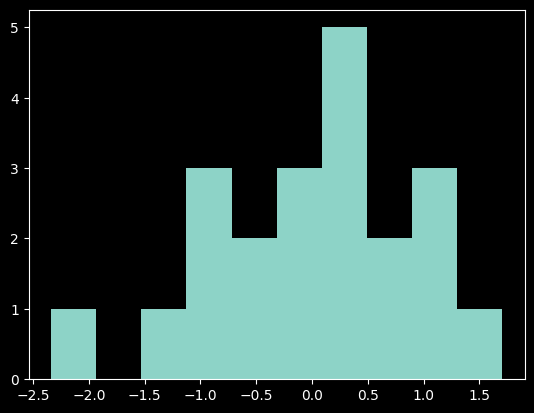

In [ ]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [ ]:
data_1 = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_expo","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_expo,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data_1)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,1.398343,0.682271
1,rmse_log,1.333748,0.710948
2,rmse_expo,1.792145,0.695443
3,rmse_quad,1.347142,0.793693


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')   

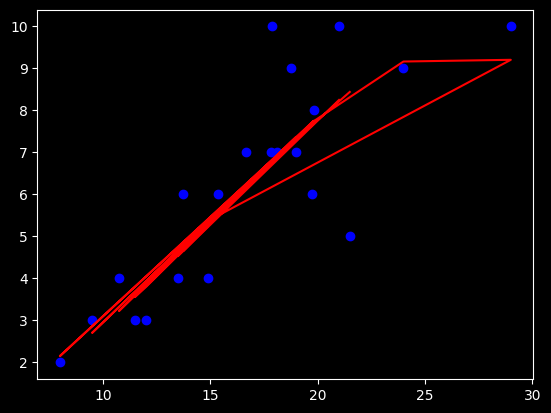

In [ ]:
plt.scatter(data['Delivery_Time'],data['Sorting_Time'],c="b")
plt.plot(data['Delivery_Time'],pred4,"r")

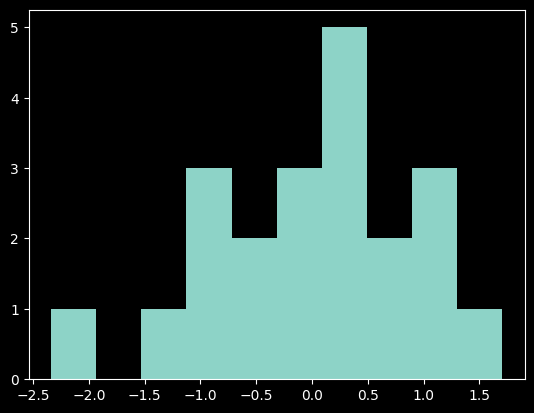

In [ ]:
plt.hist(model_quad.resid_pearson)  
plt.show() 